In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
apart_deal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Apart Deal.csv',encoding='utf-8', index_col=0)
apart_deal.head()

<ipython-input-4-f2519bc533fd>:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  apart_deal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Apart Deal.csv',encoding='utf-8', index_col=0)


,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
지역코드,,,,,,,,
31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700


In [5]:
apart_deal.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5002839 entries, 31110.0 to 50130.0
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   법정동     object 
 1   거래일     object 
 2   아파트     object 
 3   지번      object 
 4   전용면적    float64
 5   층       object 
 6   건축년도    float64
 7   거래금액    object 
dtypes: float64(2), object(6)
memory usage: 343.5+ MB


In [6]:
#결측값 확인
print(apart_deal.isna().sum())

법정동       0
거래일       0
아파트       0
지번      438
전용면적      0
층         0
건축년도     76
거래금액      0
dtype: int64


In [7]:
#거래금액과 층 열을 int로 변환
apart_deal['거래금액'] = apart_deal['거래금액'].astype(str).str.replace(',', '').astype(int)
apart_deal['층'] = apart_deal['층'].astype(str).apply(lambda x: re.sub(r'\D', '', x))
apart_deal['층'] = pd.to_numeric(apart_deal['층'], errors='coerce')
apart_deal['층'] = apart_deal['층'].fillna(0).astype(int)

In [8]:
#지번을 삭제하고 건축년도의 결측값 삭제
apart_deal.drop('지번', axis=1, inplace=True)
apart_deal = apart_deal.dropna(subset=['건축년도'])
print(apart_deal.isna().sum())

법정동     0
거래일     0
아파트     0
전용면적    0
층       0
건축년도    0
거래금액    0
dtype: int64


In [9]:
#변환 확인
apart_deal.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5002763 entries, 31110.0 to 50130.0
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   법정동     object 
 1   거래일     object 
 2   아파트     object 
 3   전용면적    float64
 4   층       int64  
 5   건축년도    float64
 6   거래금액    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 305.3+ MB


In [10]:
#가장 거래가 많이 된 아파트 탑10
apart_stats = apart_deal.pivot_table(index='아파트', aggfunc={'거래일': 'size', '거래금액': 'sum'})
sorted_apart_stats = apart_stats.sort_values(by='거래일', ascending=False)
sorted_apart_stats.columns = ['거래금액', '거래수']
top10_apart_stats = sorted_apart_stats.head(10)
print(top10_apart_stats)

           거래금액    거래수
아파트                   
현대   1044787312  41943
주공    232515837  15824
삼성    457255152  15364
성원    318026833  15143
주공2   284853101  14918
우성    394215940  14579
한신    352185810  12256
주공3   213729569  11844
주공1   236473002  11139
동아    262141342   9776


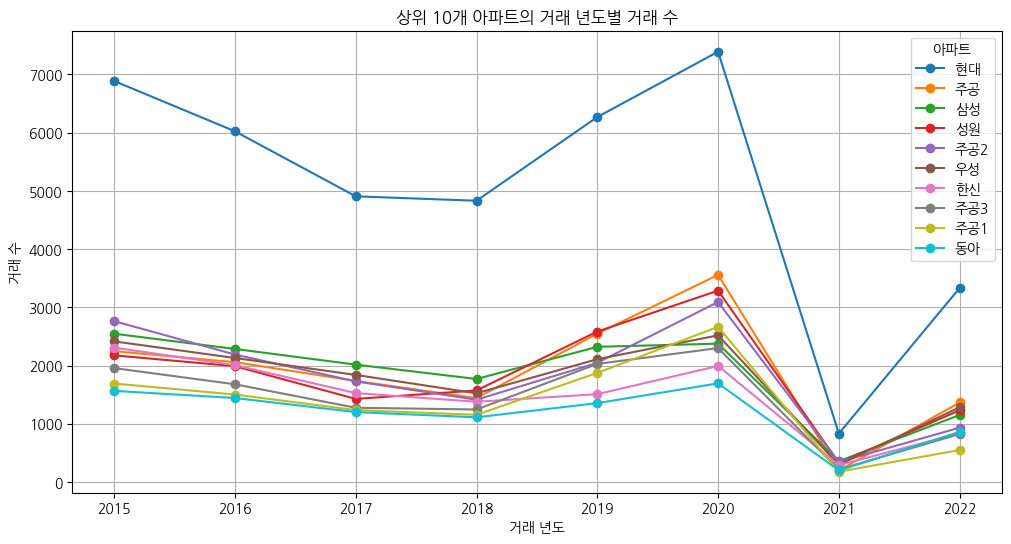

In [11]:
#상위 10개 아파트의 거래 년도별 거래 수
apart_deal['거래일'] = pd.to_datetime(apart_deal['거래일'])
apart_deal['거래년도'] = apart_deal['거래일'].dt.year

no2023_apart_deal = apart_deal[apart_deal['거래년도'] != 2023]
apartment_counts = no2023_apart_deal['아파트'].value_counts()
top10_apartments = apartment_counts.head(10).index.tolist()
plt.figure(figsize=(12, 6))
for apartment in top10_apartments:
    apartment_data = no2023_apart_deal[no2023_apart_deal['아파트'] == apartment]
    apartment_counts_year = apartment_data.groupby('거래년도').size()
    plt.plot(apartment_counts_year.index, apartment_counts_year.values, marker='o', label=apartment)

plt.title('상위 10개 아파트의 거래 년도별 거래 수')
plt.xlabel('거래 년도')
plt.ylabel('거래 수')
plt.legend(title='아파트')
plt.xticks(no2023_apart_deal['거래년도'].unique())
plt.grid(True)
plt.show()

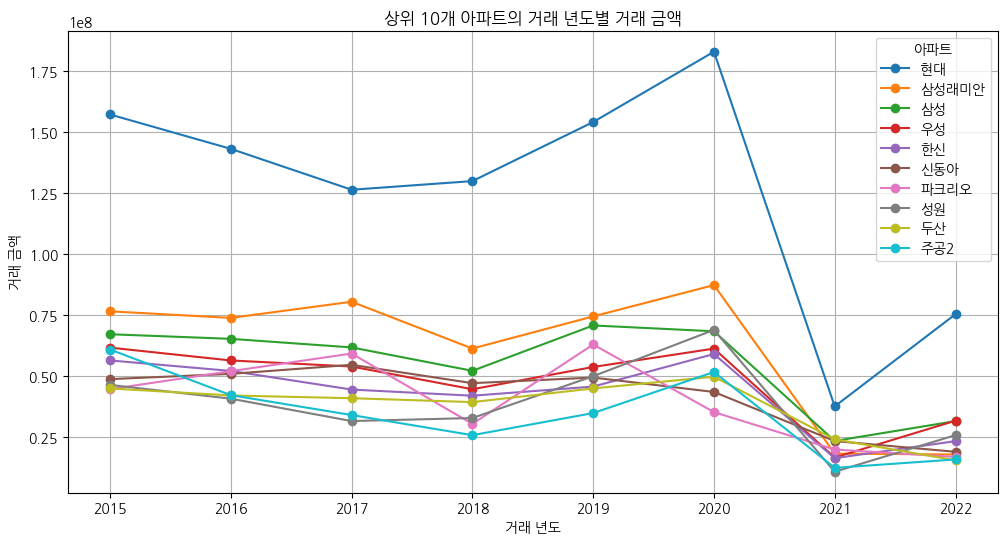

In [12]:
#상위 10개 아파트의 거래 년도별 거래 금액
apart_amount = no2023_apart_deal.groupby('아파트')['거래금액'].sum()
top10_apartments = apart_amount.groupby('아파트').sum().sort_values(ascending=False)[:10].index.tolist()

plt.figure(figsize=(12, 6))
for apartment in top10_apartments:
    apartment_data = no2023_apart_deal[no2023_apart_deal['아파트'] == apartment]
    apartment_amount_year = apartment_data.groupby('거래년도')['거래금액'].sum()
    plt.plot(apartment_amount_year.index, apartment_amount_year.values, marker='o', label=apartment)

plt.title('상위 10개 아파트의 거래 년도별 거래 금액')
plt.xlabel('거래 년도')
plt.ylabel('거래 금액')
plt.legend(title='아파트')
plt.xticks(no2023_apart_deal['거래년도'].unique())
plt.grid(True)
plt.show()

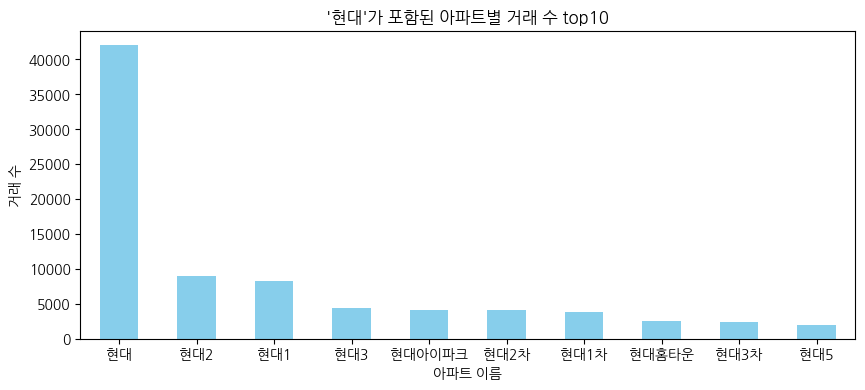

In [13]:
#'현대'가 포함된 아파트별 거래 수 top10
hyundai_apart = apart_deal[apart_deal['아파트'].str.contains('현대')]
hyundai_apart_counts = hyundai_apart['아파트'].value_counts()
top10_hyundai_apart = hyundai_apart_counts.head(10)
plt.figure(figsize=(10, 4))
top10_hyundai_apart.plot(kind='bar', color='skyblue')
plt.title("'현대'가 포함된 아파트별 거래 수 top10")
plt.xlabel('아파트 이름')
plt.ylabel('거래 수')
plt.xticks(rotation=0)
plt.show()

In [14]:
#평균거래금액이 가장 높은 / 낮은 10개 아파트의 정보
build_year = apart_deal.groupby(['건축년도', '법정동', '아파트']).agg({'거래금액': 'mean'}).reset_index()
build_year.columns = ['건축년도', '법정동', '아파트', '평균거래금액']
build_year_sorted_top = build_year.sort_values(by='평균거래금액', ascending=False).head(10)
build_year_sorted_bottom = build_year.sort_values(by='평균거래금액', ascending=False).tail(10)

print("상위 10개:\n", build_year_sorted_top)
print("\n하위 10개:\n", build_year_sorted_bottom)

상위 10개:
          건축년도    법정동            아파트        평균거래금액
45676  2020.0    청담동          PH129  1.195814e+06
45726  2020.0    한남동          파르크한남  1.185714e+06
44886  2019.0    한남동       르가든더메인한남  7.742857e+05
44885  2019.0    한남동          나인원한남  7.720000e+05
44813  2019.0    청담동  효성빌라청담101(B동)  7.470000e+05
45330  2020.0  성수동1가      아크로서울포레스트  6.830000e+05
30962  2006.0    청담동     상지리츠빌카일룸2차  6.383750e+05
35024  2011.0  성수동1가         갤러리아포레  6.371667e+05
44811  2019.0    청담동        청담어퍼하우스  6.333333e+05
42815  2018.0    도곡동       상지리츠빌카일룸  5.802333e+05

하위 10개:
          건축년도      법정동           아파트       평균거래금액
8724   1992.0  동화면 남평리     동화미혼여성근로자  1300.000000
5134   1989.0      목행동          새한임대  1265.000000
16986  1998.0  안강읍 산대리        안강장미마을  1250.000000
6205   1990.0      발한동            대원  1105.283019
7219   1991.0  낭산면 용기리            태양  1064.622642
6086   1990.0  도안면 석곡리  미혼여성근로자임대아파트  1047.333333
15458  1997.0  도화면 당오리           뉴코아   820.747664
6238   1990.0  복수면 용진리         

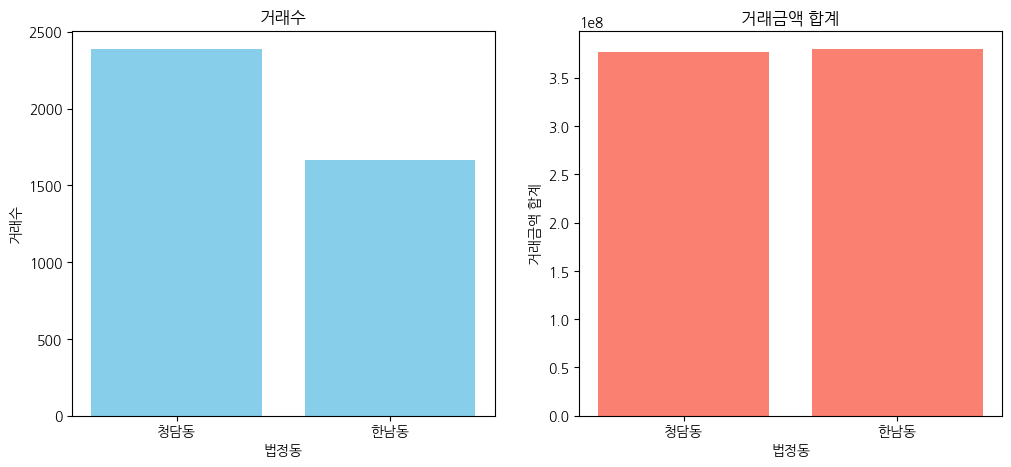

In [15]:
#법정동이 청담동, 한남동인 아파트의 거래수와 거래금액 비교
select_dong = apart_deal[(apart_deal['법정동'] == '청담동') | (apart_deal['법정동'] == '한남동')]
dong_pivot_table = select_dong.pivot_table(index='법정동', values='거래금액', aggfunc=['count', 'sum'])
dong_pivot_table.columns = ['거래수', '거래금액_합계']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(dong_pivot_table.index, dong_pivot_table['거래수'], color='skyblue')
plt.title('거래수')
plt.xlabel('법정동')
plt.ylabel('거래수')

plt.subplot(1, 2, 2)
plt.bar(dong_pivot_table.index, dong_pivot_table['거래금액_합계'], color='salmon')
plt.title('거래금액 합계')
plt.xlabel('법정동')
plt.ylabel('거래금액 합계')
plt.show()

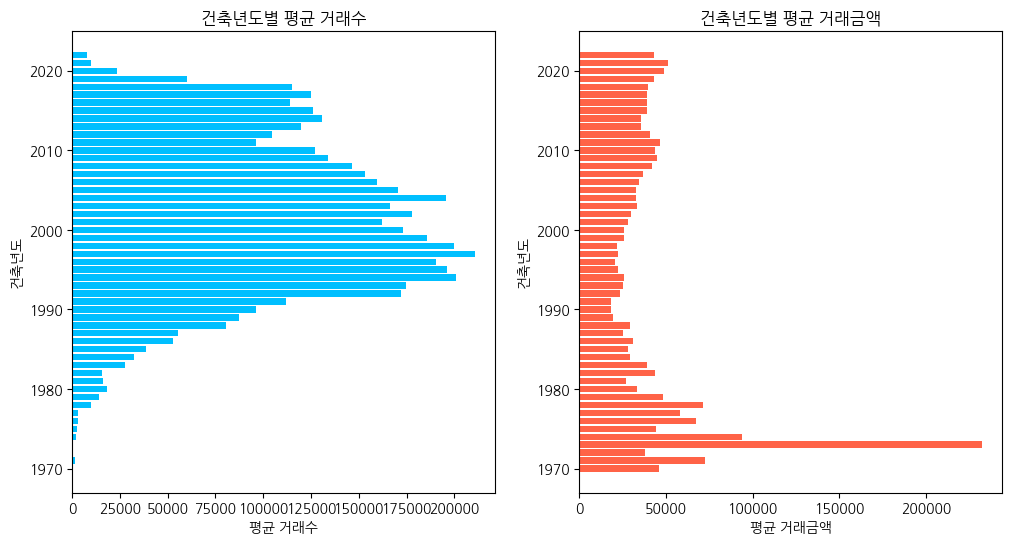

In [19]:
#건축년도별 평균 거래수와 거래금액
year_filtered_data = apart_deal[(apart_deal['건축년도'] >= 1970) & (apart_deal['건축년도'] != 2023)]
mean_per_year = year_filtered_data.groupby('건축년도').agg({'거래금액': 'mean', '거래일': 'size'}).reset_index()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(mean_per_year['건축년도'], mean_per_year['거래일'], color='deepskyblue')
plt.title('건축년도별 평균 거래수')
plt.xlabel('평균 거래수')
plt.ylabel('건축년도')

plt.subplot(1, 2, 2)
plt.barh(mean_per_year['건축년도'], mean_per_year['거래금액'], color='tomato')
plt.title('건축년도별 평균 거래금액')
plt.xlabel('평균 거래금액')
plt.ylabel('건축년도')
plt.show()

<ipython-input-20-1afde9de4bfd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = apart_deal.corr()


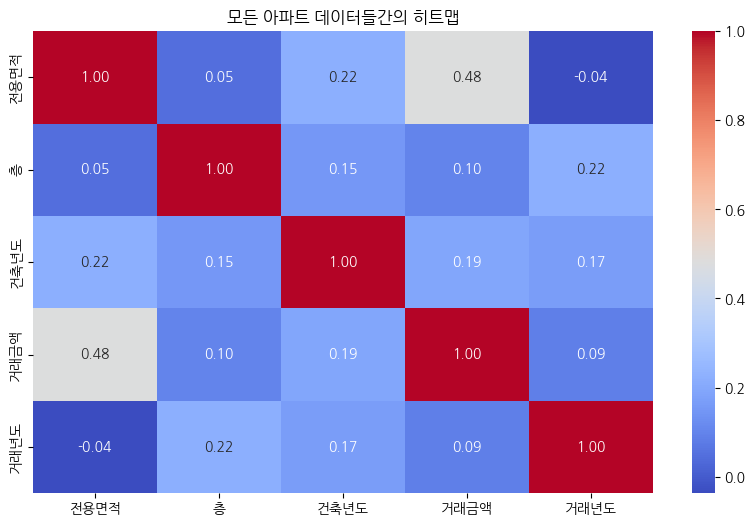

In [20]:
#모든 아파트 데이터들간의 히트맵
correlation_matrix = apart_deal.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('모든 아파트 데이터들간의 히트맵')
plt.show()

In [21]:
import statsmodels.api as sm
X = apart_deal[['전용면적','건축년도']]
y = apart_deal['거래금액']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   거래금액   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                 7.761e+05
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:08:41   Log-Likelihood:            -5.7765e+07
No. Observations:             5002763   AIC:                         1.155e+08
Df Residuals:                 5002760   BIC:                         1.155e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.42e+05   2420.543   -223.926      0.0